<a href="https://colab.research.google.com/github/OMatheusWander/IntroCienciaDaComputacao2019/blob/main/houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # ler os bancos de dados
import numpy as np # fazer mtm
import matplotlib.pyplot as plt # para plotar
import statsmodels.api as sm #rotinas de econometria

In [32]:
file_path = 'https://petterini.ufsc.br/files/2023/08/houses.txt'
data = pd.read_csv(file_path, delimiter=',',encoding='utf-8')
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [37]:
data = data[data['Rent'] <= 3500000]
data = data[data['m2'] >= 10]

In [36]:
data['m2'] = data ['Size']/10.76

In [27]:
y = np.log(data['Rent'])
x = np.log(data['m2'])

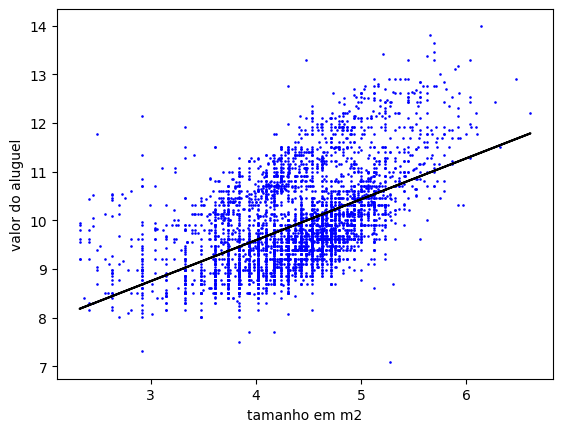

In [30]:
plt.scatter(x, y, color='blue', marker='.', s=3)
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
y_fit = polynomial(x)
plt.plot(x, y_fit, color='black')
plt.xlabel('tamanho em m2')
plt.ylabel('valor do aluguel')
plt.show()

In [ ]:
x = np

In [ ]:
data = data[data['Rent']]

In [10]:
data = data.sort_values(by= 'Rent', ascending=True)

In [57]:
ones = np.ones(len(y)) # vetores com apenas 1's
X = np.transpose(np.array([[ones,data['m2']], data['Bathroom']]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     1776.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:39:47   Log-Likelihood:                -5500.4
No. Observations:                4617   AIC:                         1.100e+04
Df Residuals:                    4615   BIC:                         1.102e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2258      0.088     70.920      0.0

<ipython-input-57-93a0c0ac0b9c>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.transpose(np.array([[ones,data['m2']], data['Bathroom']]))


In [52]:
ones = np.ones(len(y)) # vetores com apenas 1's
X = np.transpose(np.array([ones,x]))
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
XT = np.transpose(X)
XTX_inv = np.linalg.inv(XT.dot(X))
beta = XTX_inv.dot(XT).dot(y)
beta

array([6.22577995, 0.84158203])

In [60]:
data['Rent_pred2'] = (np.exp(8.4567))*(data['m2']**0.0017)*(data['Bathroom']**0.6462)
print(data['Rent_pred2'])

0       7424.035074
1       4741.102201
2       4742.901051
3       4741.102201
4       4741.590853
           ...     
4741    7422.832275
4742    9657.652398
4743    9655.460327
4744    7427.950528
4745    7422.832275
Name: Rent_pred2, Length: 4585, dtype: float64


In [47]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     1776.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:24:10   Log-Likelihood:                -5500.4
No. Observations:                4617   AIC:                         1.100e+04
Df Residuals:                    4615   BIC:                         1.102e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2258      0.088     70.920      0.0

In [48]:
res = Y-X.dot(beta)
sigma2 = sum(res**2)/(len(y)-2)
varcovar = sigma2*XTX_inv
errop = np.sqrt(np.diagonal(varcovar))
t = np.transpose(beta)/errop
print(t)

NameError: ignored

In [ ]:
SQR = sum(res**2)
SQT = sum((Y-np.mean(Y))**2)
R2 = 1-SQR/SQT
R2

0.23640633382224518